In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import math

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

import plotly.graph_objects as go
import plotly.express as px

import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

plt.rcParams.update({'font.size': 16})

### Obs.: Plotly doesn't open in Github. Please download notebook to use.

In [2]:
pd.set_option("display.precision", 5)
pd.set_option('display.max_rows', 15)

In [3]:
pd.options.display.float_format = '{:.4f}'.format

In [4]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

In [5]:
# filename = '/home/davi/Documents/Python/Covid-19-Data/owid-covid-data.csv'

In [6]:
df = pd.read_csv(url)
df['date'] = pd.to_datetime(df['date'])
df['location'] = df['location'].replace(['United States'],'United_States')
df['location'] = df['location'].replace(['United Kingdom'],'United_Kingdom')
df

iso_code continent       location       date  total_cases  new_cases  \
0          AFG      Asia    Afghanistan 2019-12-31       0.0000     0.0000   
1          AFG      Asia    Afghanistan 2020-01-01       0.0000     0.0000   
2          AFG      Asia    Afghanistan 2020-01-02       0.0000     0.0000   
3          AFG      Asia    Afghanistan 2020-01-03       0.0000     0.0000   
4          AFG      Asia    Afghanistan 2020-01-04       0.0000     0.0000   
...        ...       ...            ...        ...          ...        ...   
34868      NaN       NaN  International 2020-02-28     705.0000     0.0000   
34869      NaN       NaN  International 2020-02-29     705.0000     0.0000   
34870      NaN       NaN  International 2020-03-01     705.0000     0.0000   
34871      NaN       NaN  International 2020-03-02     705.0000     0.0000   
34872      NaN       NaN  International 2020-03-10     696.0000    -9.0000   

       total_deaths  new_deaths  total_cases_per_million  \
0            0.0000      0.0000                   0.0000   
1            0.0000      0.0000                   0.0000   
2            0.0000      0.0000                   0.0000   
3            0.0000      0.0000                   0.0000   
4            0.0000      0.0000                   0.0000   
...             ...         ...                      ...   
34868        4.0000      0.0000                      nan   
34869        6.0000      2.0000                      nan   
34870        6.0000      0.0000                      nan   
34871        6.0000      0.0000                      nan   
34872        7.0000      1.0000                      nan   

       new_cases_per_million  ...  aged_70_older  gdp_per_capita  \
0                     0.0000  ...         1.3370       1803.9870   
1                     0.0000  ...         1.3370       1803.9870   
2                     0.0000  ...         1.3370       1803.9870   
3                     0.0000  ...         1.3370       1803.9870   
4                     0.0000  ...         1.3370       1803.9870   
...                      ...  ...            ...             ...   
34868                    nan  ...            nan             nan   
34869                    nan  ...            nan             nan   
34870                    nan  ...            nan             nan   
34871                    nan  ...            nan             nan   
34872                    nan  ...            nan             nan   

       extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
0                  nan               597.0290               9.5900   
1                  nan               597.0290               9.5900   
2                  nan               597.0290               9.5900   
3                  nan               597.0290               9.5900   
4                  nan               597.0290               9.5900   
...                ...                    ...                  ...   
34868              nan                    nan                  nan   
34869              nan                    nan                  nan   
34870              nan                    nan                  nan   
34871              nan                    nan                  nan   
34872              nan                    nan                  nan   

       female_smokers  male_smokers  handwashing_facilities  \
0                 nan           nan                 37.7460   
1                 nan           nan                 37.7460   
2                 nan           nan                 37.7460   
3                 nan           nan                 37.7460   
4                 nan           nan                 37.7460   
...               ...           ...                     ...   
34868             nan           nan                     nan   
34869             nan           nan                     nan   
34870             nan           nan                     nan   
34871             nan           nan                     nan 

In [7]:
list(df.columns)

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'total_deaths',
 'new_deaths',
 'total_cases_per_million',
 'new_cases_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'tests_per_case',
 'positive_rate',
 'tests_units',
 'stringency_index',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'hospital_beds_per_thousand',
 'life_expectancy']

#### <span style="color:red">Analysis of the last N days</span>

In [8]:
Ndays = '150days'

####  <span style="color:red">Day range for matplot</span>

In [9]:
Ninterval = 10

In [10]:
df = df.loc[:,['date', 'location', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']]
df = df[df['date'] > pd.to_datetime("today") - pd.to_timedelta(Ndays)]
df = df.sort_values(by=['total_cases'], ascending=True)
df

date              location  total_cases  total_deaths  new_cases  \
21910 2020-03-17               Myanmar       0.0000        0.0000     0.0000   
8846  2020-03-20              Djibouti       1.0000        0.0000     0.0000   
13373 2020-03-21              Guernsey       1.0000        0.0000     0.0000   
13372 2020-03-20              Guernsey       1.0000        0.0000     1.0000   
34207 2020-04-23                 Yemen       1.0000        0.0000     0.0000   
...          ...                   ...          ...           ...        ...   
31505 2020-03-13                  Togo          nan           nan        nan   
31506 2020-03-14                  Togo          nan           nan        nan   
32577 2020-03-09  United Arab Emirates          nan           nan        nan   
32580 2020-03-12  United Arab Emirates          nan           nan        nan   
32582 2020-03-14  United Arab Emirates          nan           nan        nan   

       new_deaths  
21910      0.0000  
8846       0.0000  
13373      0.0000  
13372      0.0000  
34207      0.0000  
...           ...  
31505         nan  
31506         nan  
32577         nan  
32580         nan  
32582         nan  

[30017 rows x 6 columns]

# Number of cases and deaths in World

In [11]:
dfWorld = df[df['location'] == 'World']
dfWorld = dfWorld.sort_values(by='date', ascending=True)
dfWorld = dfWorld.loc[:,['date', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']]
dfWorld.reset_index(drop=True, inplace=True)
dfWorld

date   total_cases  total_deaths   new_cases  new_deaths
0   2020-03-09   110984.0000     3813.0000   4172.0000    228.0000
1   2020-03-10   115746.0000     4021.0000   4762.0000    208.0000
2   2020-03-11   120832.0000     4294.0000   5086.0000    273.0000
3   2020-03-12   128670.0000     4620.0000   7838.0000    326.0000
4   2020-03-13   138128.0000     4970.0000   9458.0000    350.0000
..         ...           ...           ...         ...         ...
145 2020-08-01 17580519.0000   679488.0000 278896.0000   6209.0000
146 2020-08-02 17842650.0000   685265.0000 262131.0000   5777.0000
147 2020-08-03 18065526.0000   689235.0000 222876.0000   3970.0000
148 2020-08-04 18269636.0000   693733.0000 204110.0000   4498.0000
149 2020-08-05 18519579.0000   700539.0000 249943.0000   6806.0000

[150 rows x 5 columns]

In [12]:
timestamps = sorted(set(dfWorld.loc[:, 'date'].values))

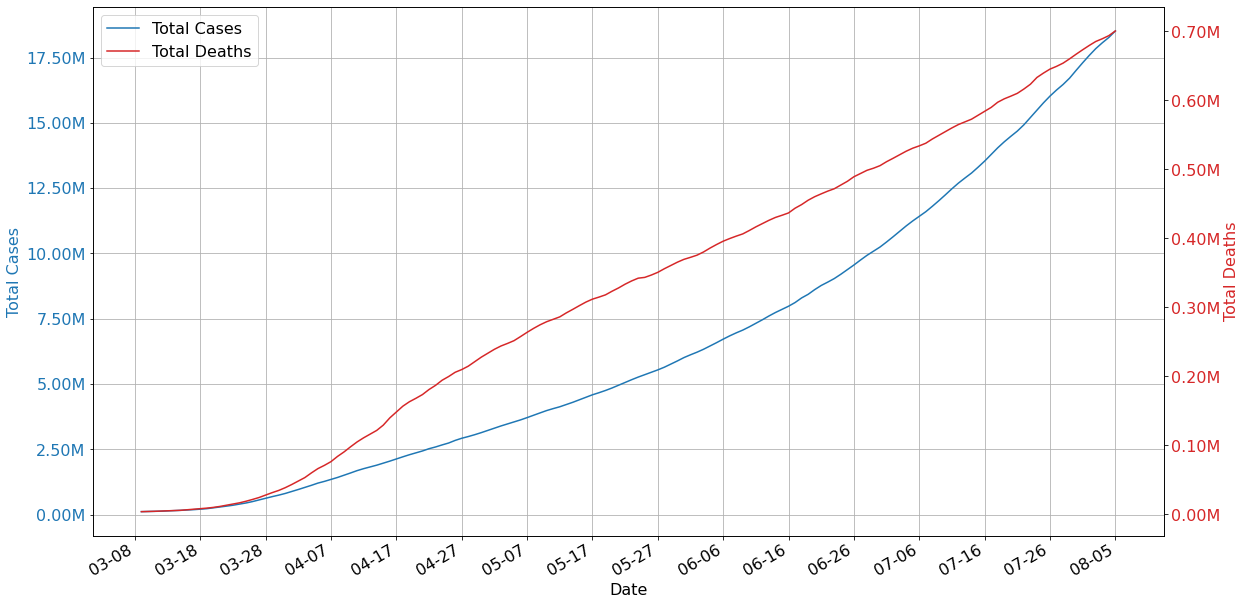

In [13]:
fig, ax1 = plt.subplots(figsize=(19.20,10.80))

color = 'tab:blue'
ax1.plot(dfWorld.date, dfWorld.total_cases, color=color, label='Total Cases')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Cases', color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.ticklabel_format(style='plain', axis='y')
plt.grid()
ax2 = ax1.twinx()

color = 'tab:red'
ax2.plot(dfWorld.date, dfWorld.total_deaths, color=color, label = 'Total Deaths')
ax2.set_xlabel('Date')
ax2.set_ylabel('Total Deaths', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
plt.gcf().autofmt_xdate()

fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)

plt.show()

### Daily deaths

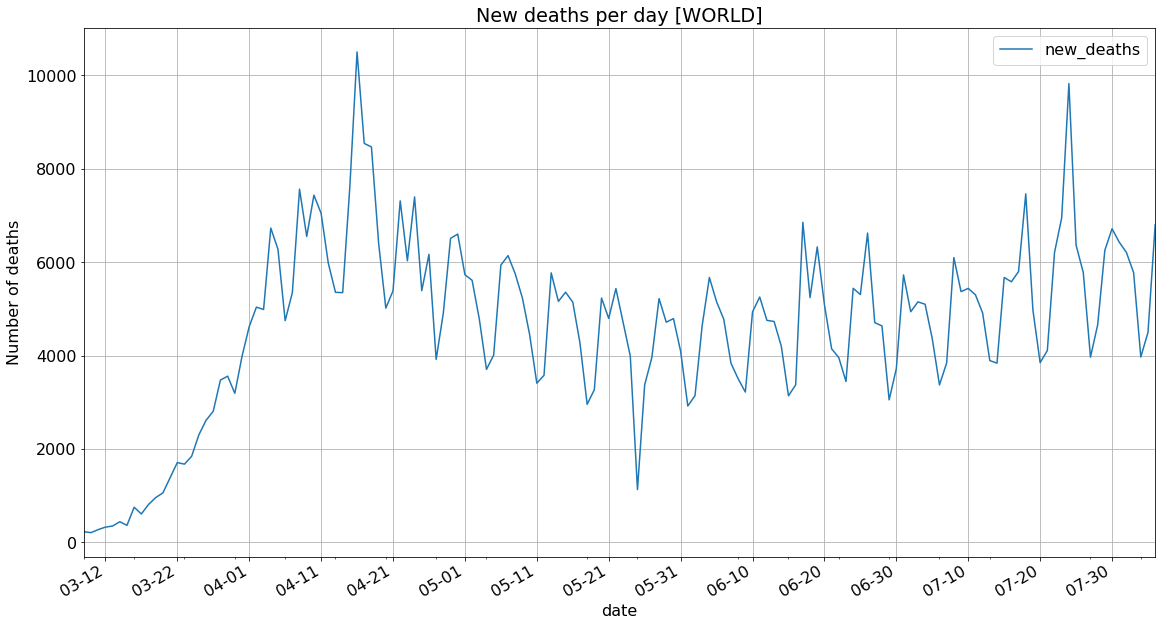

In [14]:
dfWorld.plot(x='date', y='new_deaths', figsize=(19.20,10.80))

plt.ylabel('Number of deaths')
plt.title('New deaths per day [WORLD]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

#### Plotly example

In [15]:
figWorld = go.Figure()
figWorld.add_trace(go.Scatter(x=dfWorld.date, y=dfWorld.new_deaths, name='Daily Deaths'))

figWorld.update_traces(mode="markers+lines")
figWorld.update_layout(xaxis_tickformat = '%m-%d',
                       title='New Deaths per day [WORLD]')

figWorld.update_xaxes(nticks=25, tickangle=315)
figWorld.show()

### Daily cases

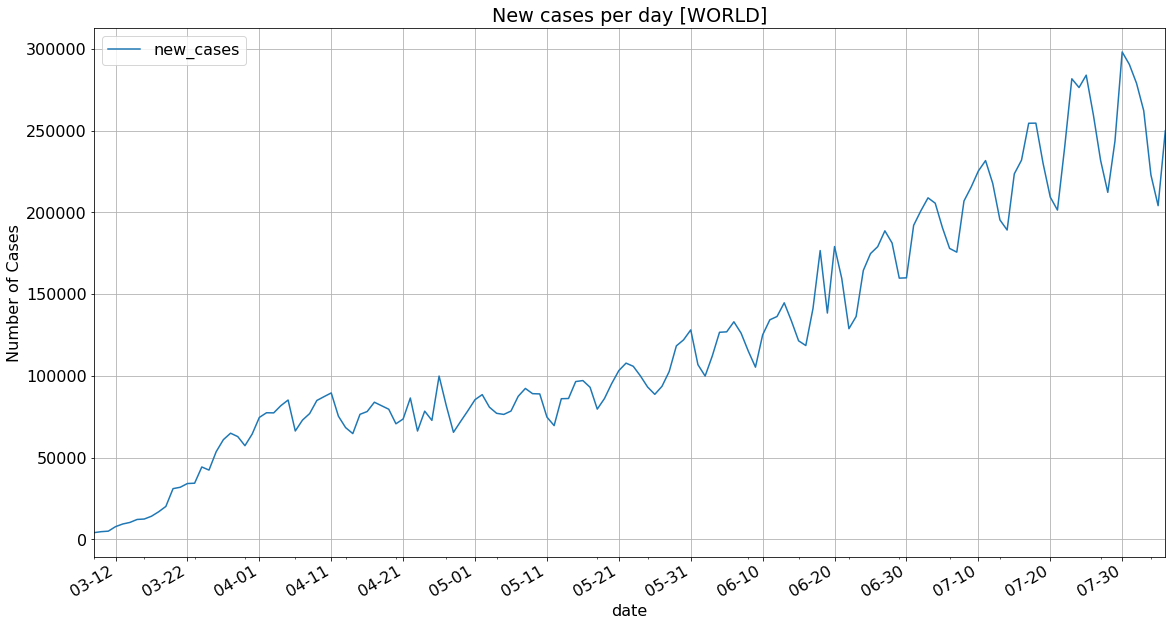

In [16]:
dfWorld.plot(x='date', y='new_cases', figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('New cases per day [WORLD]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

### <span style="color:red">Selecting Countries by the following conditions: 50k total cases and 35k deaths</span>

In [17]:
numberCases = 50000
numberDeaths = 35000

In [18]:
mainCountries = df[
        (df['total_cases'] >= numberCases) & 
        (df['total_deaths'] >= numberDeaths) &
        (df['location'] != 'World') &
        (df['location'] != 'International')
]
mainCountries = mainCountries.sort_values(by=['total_cases'], ascending=False)
mainCountries = mainCountries.dropna()
mainCountries

date        location  total_cases  total_deaths  new_cases  \
33164 2020-08-05   United_States 4771087.0000   156806.0000 57525.0000   
33163 2020-08-04   United_States 4713562.0000   155403.0000 45607.0000   
33162 2020-08-03   United_States 4667955.0000   154860.0000 47511.0000   
33161 2020-08-02   United_States 4620444.0000   154447.0000 58407.0000   
33160 2020-08-01   United_States 4562037.0000   153314.0000 67023.0000   
...          ...             ...          ...           ...        ...   
32872 2020-05-24  United_Kingdom  243081.0000    36734.0000  2062.0000   
32871 2020-05-23  United_Kingdom  241019.0000    36451.0000  2574.0000   
32870 2020-05-22  United_Kingdom  238445.0000    36093.0000  2718.0000   
32869 2020-05-21  United_Kingdom  235727.0000    35755.0000  3052.0000   
32868 2020-05-20  United_Kingdom  232675.0000    35386.0000  2589.0000   

       new_deaths  
33164   1403.0000  
33163    543.0000  
33162    413.0000  
33161   1133.0000  
33160   1244.0000  
...           ...  
32872    283.0000  
32871    358.0000  
32870    338.0000  
32869    369.0000  
32868    548.0000  

[299 rows x 6 columns]

In [19]:
dfCountry = mainCountries['location'].astype(str).unique()
dfCountry

array(['United_States', 'Brazil', 'India', 'Mexico', 'United_Kingdom',
       'Italy'], dtype=object)

In [20]:
d = {}
for index in range(len(dfCountry)):
    d[index] = df[df['location'] == dfCountry[index]]
    d[index].reset_index(drop=True, inplace=True)

## Total cases in the main countries

In [21]:
totalCases_list=[]
totalDeaths_list=[]
newCases_list=[]
newDeaths_list=[]

for index in range(len(dfCountry)):  
    
    totalCases = [d[index]['total_cases']]
    totalDeaths = [d[index]['total_deaths']]
    newCases = [d[index]['new_cases']]
    newDeaths = [d[index]['new_deaths']]
    
    header = [dfCountry[index]]
    
    totalCases = pd.concat(totalCases, axis=1, keys=header)
    totalDeaths = pd.concat(totalDeaths, axis=1, keys=header)
    newCases = pd.concat(newCases, axis=1, keys=header)
    newDeaths = pd.concat(newDeaths, axis=1, keys=header)
    
    totalCases_list.append(totalCases)
    totalDeaths_list.append(totalDeaths)
    newCases_list.append(newCases)
    newDeaths_list.append(newDeaths)

In [22]:
dfTotalCases=[]
dfTotalDeaths=[]
dfNewCases=[]
dfNewDeaths=[]

for index in range(len(dfCountry)):
    dfTotalCases = pd.concat(totalCases_list, axis=1)
    dfTotalDeaths = pd.concat(totalDeaths_list, axis=1)
    dfNewCases = pd.concat(newCases_list, axis=1)
    dfNewDeaths = pd.concat(newDeaths_list,axis=1)
    
dfTotalCases.insert(0, 'date', timestamps)
dfTotalDeaths.insert(0, 'date', timestamps)
dfNewCases.insert(0, 'date', timestamps)
dfNewDeaths.insert(0, 'date', timestamps)

### Total Cases per Country

In [23]:
dfTotalCases.sort_values(by=['date'], ascending=True)

date  United_States       Brazil        India      Mexico  \
0   2020-03-09       554.0000      25.0000      44.0000      7.0000   
1   2020-03-10       754.0000      25.0000      50.0000     11.0000   
2   2020-03-11      1025.0000      34.0000      73.0000     16.0000   
3   2020-03-12      1312.0000      52.0000      75.0000     26.0000   
4   2020-03-13      1663.0000      77.0000      83.0000     41.0000   
..         ...            ...          ...          ...         ...   
145 2020-08-01   4562037.0000 2662485.0000 1750723.0000 439046.0000   
146 2020-08-02   4620444.0000 2707877.0000 1803695.0000 443813.0000   
147 2020-08-03   4667955.0000 2733677.0000 1855745.0000 449961.0000   
148 2020-08-04   4713562.0000 2750318.0000 1908254.0000         nan   
149 2020-08-05   4771087.0000 2801921.0000          nan         nan   

     United_Kingdom       Italy  
0          412.0000   7375.0000  
1          469.0000   9172.0000  
2          617.0000  10149.0000  
3          876.0000  12462.0000  
4         1282.0000  15113.0000  
..              ...         ...  
145     303181.0000 247537.0000  
146     303952.0000 247832.0000  
147     304695.0000 248070.0000  
148     305623.0000 248229.0000  
149     306293.0000 248419.0000  

[150 rows x 7 columns]

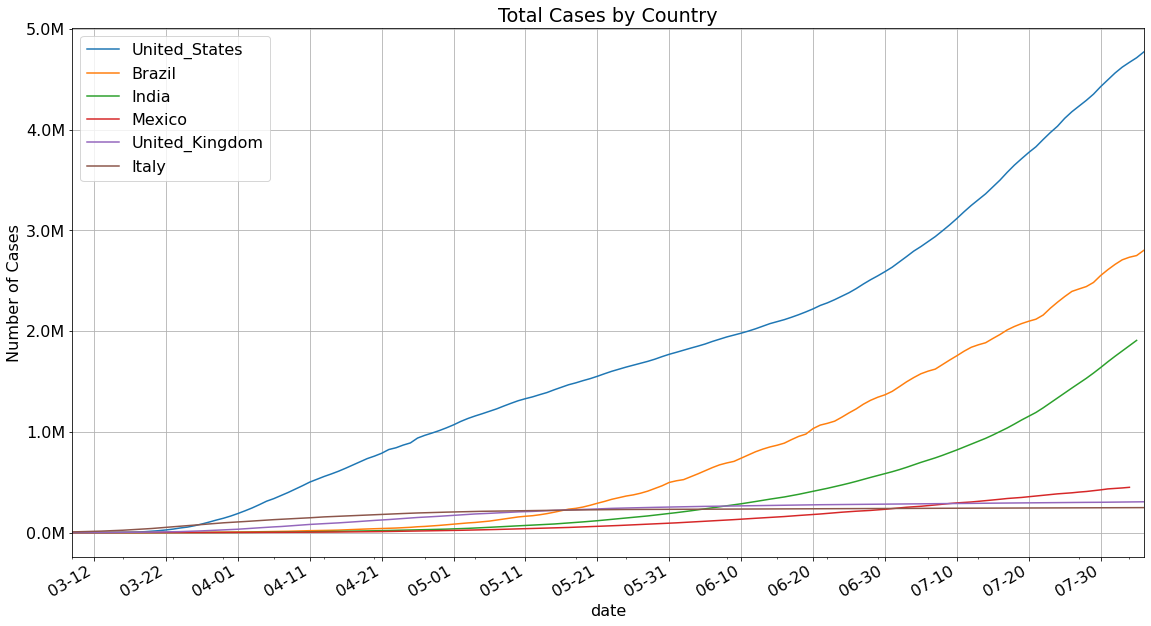

In [24]:
dfTotalCases.plot(x='date', y=dfCountry, figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('Total Cases by Country')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.1f}'.format(y/1000000) + 'M'))

plt.grid()
plt.show()

## Log analysis log<sub>b</sub><sup>x</sup>

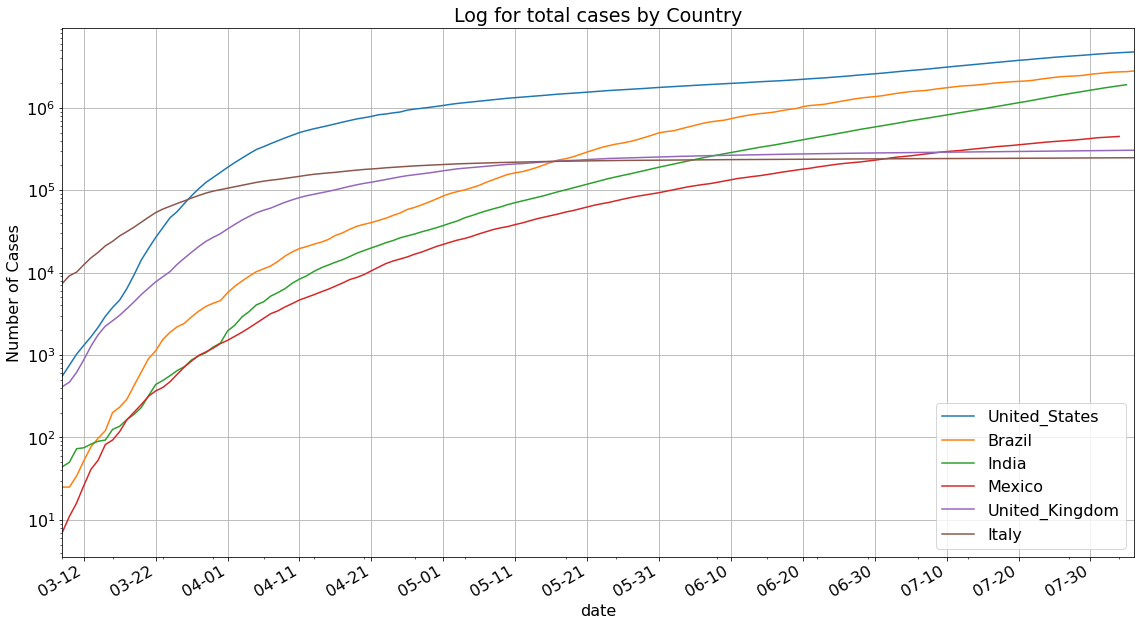

In [25]:
dfTotalCases.plot(x='date', y=dfCountry, logx=False, logy=True, figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('Log for total cases by Country')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

### Total Deaths by Country

In [26]:
dfTotalDeaths.sort_values(by=['date'], ascending=True)

date  United_States     Brazil      India     Mexico  \
0   2020-03-09        21.0000     0.0000     0.0000     0.0000   
1   2020-03-10        26.0000     0.0000     0.0000     0.0000   
2   2020-03-11        28.0000     0.0000     0.0000     0.0000   
3   2020-03-12        30.0000     0.0000     1.0000     0.0000   
4   2020-03-13        40.0000     0.0000     2.0000     0.0000   
..         ...            ...        ...        ...        ...   
145 2020-08-01    153314.0000 92475.0000 37364.0000 47746.0000   
146 2020-08-02    154447.0000 93563.0000 38135.0000 48012.0000   
147 2020-08-03    154860.0000 94104.0000 38938.0000 48869.0000   
148 2020-08-04    155403.0000 94665.0000 39795.0000        nan   
149 2020-08-05    156806.0000 95819.0000        nan        nan   

     United_Kingdom      Italy  
0            2.0000   366.0000  
1            3.0000   464.0000  
2            7.0000   631.0000  
3            7.0000   827.0000  
4            9.0000  1016.0000  
..              ...        ...  
145      46119.0000 35141.0000  
146      46193.0000 35146.0000  
147      46201.0000 35154.0000  
148      46210.0000 35166.0000  
149      46299.0000 35171.0000  

[150 rows x 7 columns]

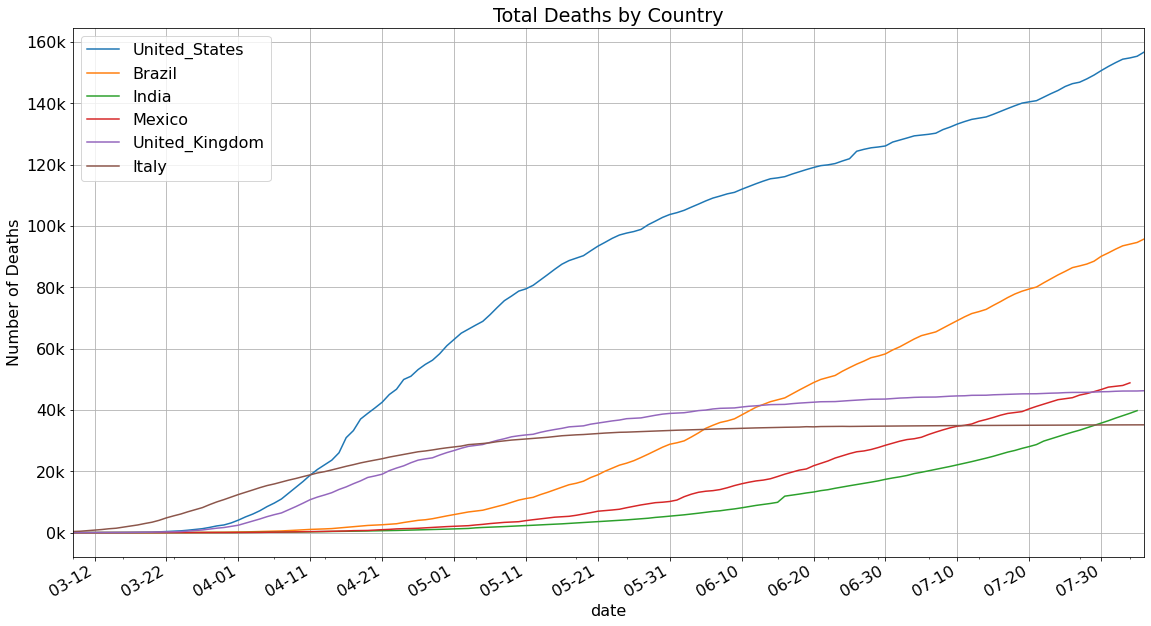

In [27]:
dfTotalDeaths.plot(x='date', y=dfCountry, figsize=(19.20,10.80))

plt.ylabel('Number of Deaths')
plt.title('Total Deaths by Country')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'k'))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

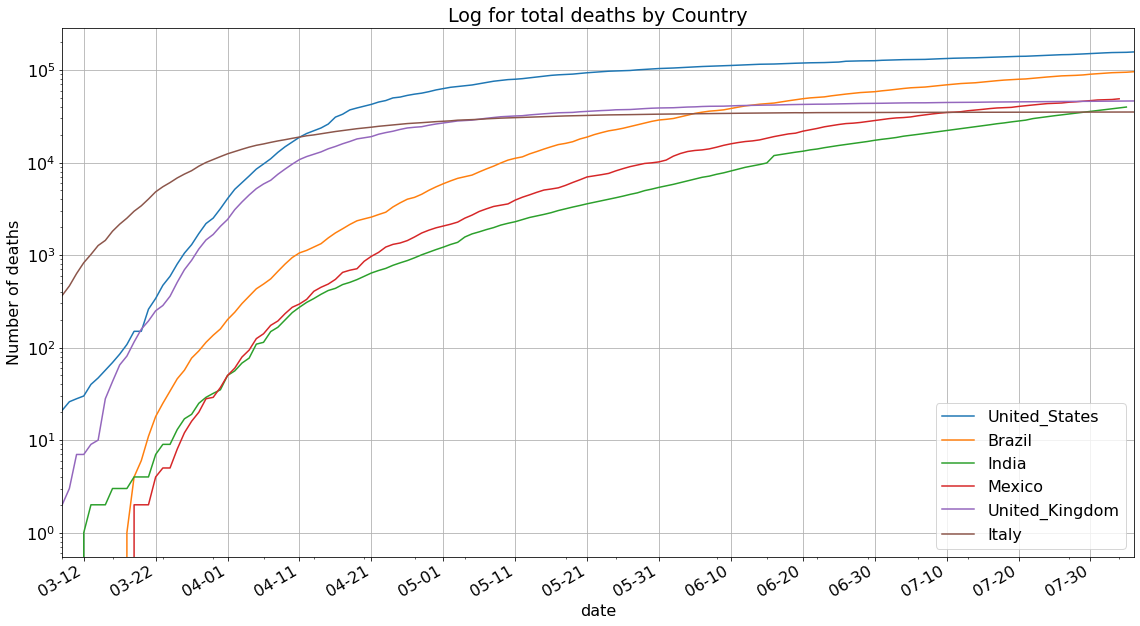

In [28]:
dfTotalDeaths.plot(x='date', y=dfCountry, logx=False, logy=True, figsize=(19.20,10.80))

plt.ylabel('Number of deaths')
plt.title('Log for total deaths by Country')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

### Daily cases

In [29]:
dfNewCases.sort_values(by=['date'], ascending=True)

date  United_States     Brazil      India    Mexico  United_Kingdom  \
0   2020-03-09       121.0000    12.0000    10.0000    2.0000         60.0000   
1   2020-03-10       200.0000     0.0000     6.0000    4.0000         57.0000   
2   2020-03-11       271.0000     9.0000    23.0000    5.0000        148.0000   
3   2020-03-12       287.0000    18.0000     2.0000   10.0000        259.0000   
4   2020-03-13       351.0000    25.0000     8.0000   15.0000        406.0000   
..         ...            ...        ...        ...       ...             ...   
145 2020-08-01     67023.0000 52383.0000 54735.0000 4853.0000        880.0000   
146 2020-08-02     58407.0000 45392.0000 52972.0000 4767.0000        771.0000   
147 2020-08-03     47511.0000 25800.0000 52050.0000 6148.0000        743.0000   
148 2020-08-04     45607.0000 16641.0000 52509.0000       nan        928.0000   
149 2020-08-05     57525.0000 51603.0000        nan       nan        670.0000   

        Italy  
0   1492.0000  
1   1797.0000  
2    977.0000  
3   2313.0000  
4   2651.0000  
..        ...  
145  379.0000  
146  295.0000  
147  238.0000  
148  159.0000  
149  190.0000  

[150 rows x 7 columns]

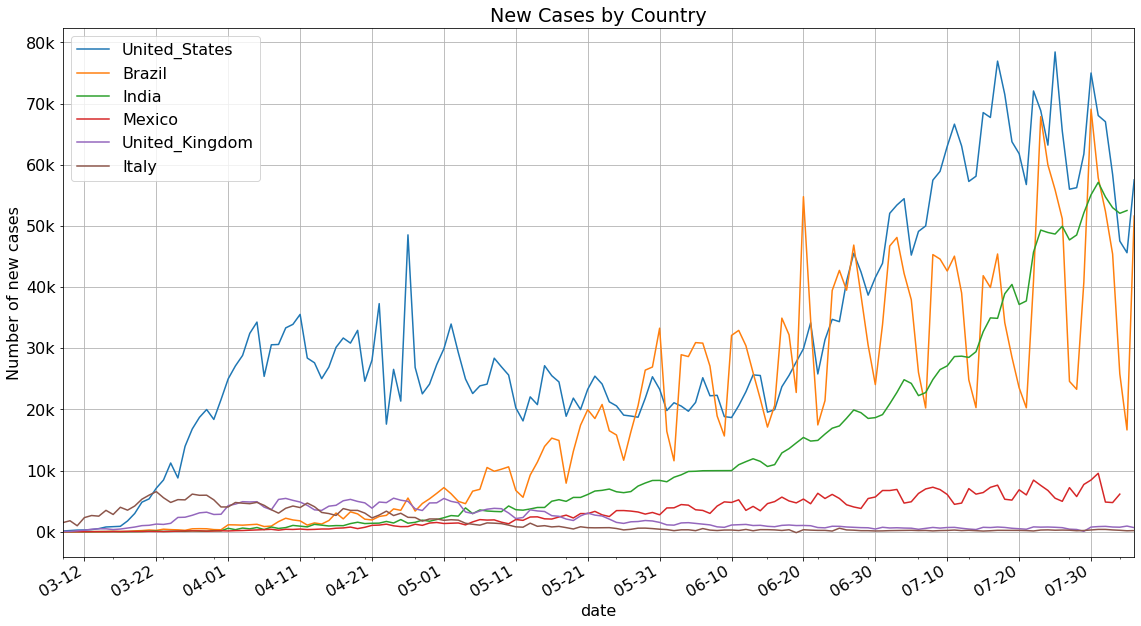

In [30]:
dfNewCases.plot(x='date', y=dfCountry, figsize=(19.20,10.80))

plt.ylabel('Number of new cases')
plt.title('New Cases by Country')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'k'))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

#### Plotly example

In [31]:
toGo = dfNewCases.sort_values(by='date', ascending=False)
toGo = toGo.set_index('date')

In [32]:
figTest = go.Figure()
for index in range(len(dfCountry)):
    figTest.add_trace(go.Scatter(x=toGo.index, y=toGo.iloc[:,index], name=dfCountry[index]))

figTest.update_traces(mode="markers+lines")
figTest.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left", 
                                  x=0.01, traceorder='reversed', font_size=15),
                                  title='New deaths per day in the main countries')

figTest.show()

### Daily deaths

In [33]:
dfNewDeaths.sort_values(by=['date'], ascending=True)

date  United_States    Brazil    India   Mexico  United_Kingdom  \
0   2020-03-09         4.0000    0.0000   0.0000   0.0000          0.0000   
1   2020-03-10         5.0000    0.0000   0.0000   0.0000          1.0000   
2   2020-03-11         2.0000    0.0000   0.0000   0.0000          4.0000   
3   2020-03-12         2.0000    0.0000   1.0000   0.0000          0.0000   
4   2020-03-13        10.0000    0.0000   1.0000   0.0000          2.0000   
..         ...            ...       ...      ...      ...             ...   
145 2020-08-01      1244.0000 1212.0000 853.0000 274.0000        120.0000   
146 2020-08-02      1133.0000 1088.0000 771.0000 266.0000         74.0000   
147 2020-08-03       413.0000  541.0000 803.0000 857.0000          8.0000   
148 2020-08-04       543.0000  561.0000 857.0000      nan          9.0000   
149 2020-08-05      1403.0000 1154.0000      nan      nan         89.0000   

       Italy  
0   133.0000  
1    98.0000  
2   167.0000  
3   196.0000  
4   189.0000  
..       ...  
145   9.0000  
146   5.0000  
147   8.0000  
148  12.0000  
149   5.0000  

[150 rows x 7 columns]

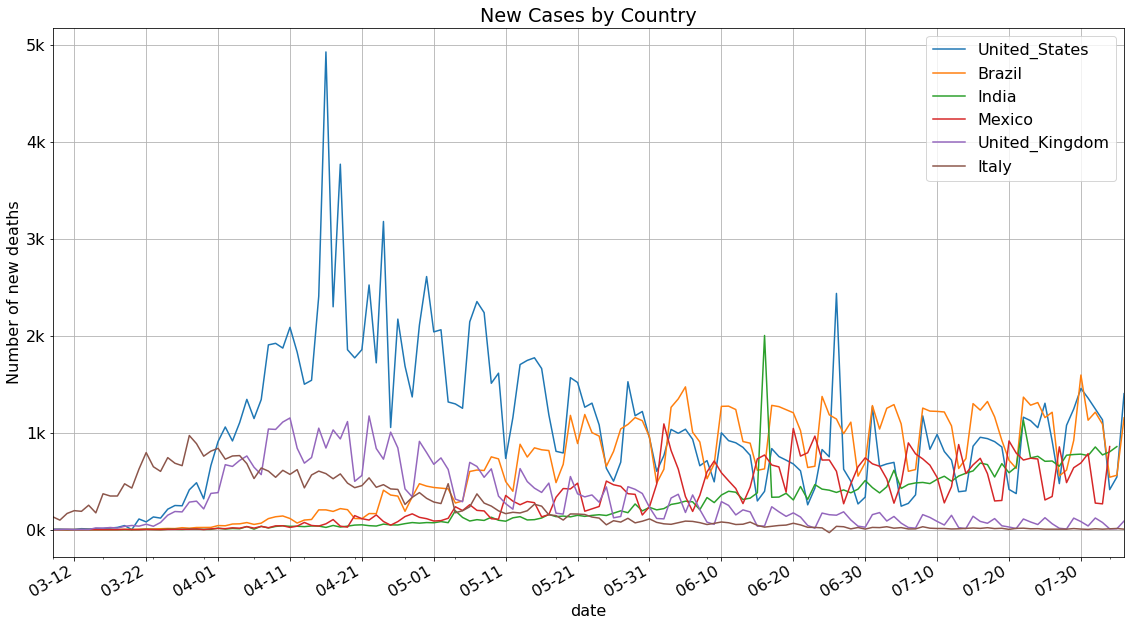

In [34]:
dfNewDeaths.plot(x='date', y=dfCountry, figsize=(19.20,10.80))

plt.ylabel('Number of new deaths')
plt.title('New Cases by Country')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'k'))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

### Total cases and deaths by country

In [35]:
dfTotalCases

date  United_States       Brazil        India      Mexico  \
0   2020-03-09       554.0000      25.0000      44.0000      7.0000   
1   2020-03-10       754.0000      25.0000      50.0000     11.0000   
2   2020-03-11      1025.0000      34.0000      73.0000     16.0000   
3   2020-03-12      1312.0000      52.0000      75.0000     26.0000   
4   2020-03-13      1663.0000      77.0000      83.0000     41.0000   
..         ...            ...          ...          ...         ...   
145 2020-08-01   4562037.0000 2662485.0000 1750723.0000 439046.0000   
146 2020-08-02   4620444.0000 2707877.0000 1803695.0000 443813.0000   
147 2020-08-03   4667955.0000 2733677.0000 1855745.0000 449961.0000   
148 2020-08-04   4713562.0000 2750318.0000 1908254.0000         nan   
149 2020-08-05   4771087.0000 2801921.0000          nan         nan   

     United_Kingdom       Italy  
0          412.0000   7375.0000  
1          469.0000   9172.0000  
2          617.0000  10149.0000  
3          876.0000  12462.0000  
4         1282.0000  15113.0000  
..              ...         ...  
145     303181.0000 247537.0000  
146     303952.0000 247832.0000  
147     304695.0000 248070.0000  
148     305623.0000 248229.0000  
149     306293.0000 248419.0000  

[150 rows x 7 columns]

In [36]:
# for index in range(len(dfCountry)):
    
#     ax = dfTotalCases.plot(x='date', y=[dfCountry[index]], figsize=(19.20,10.80))
#     dfTotalDeaths.plot(ax=ax, x='date', y=[dfCountry[index]])
    
#     plt.ylabel('Total cases per day')
#     ax.legend(["Total Cases", "Total Deaths"]);
#     plt.title(dfCountry[index])
    
#     ax = plt.gca()
#     ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#     plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
#     plt.gcf().autofmt_xdate()
#     plt.grid()

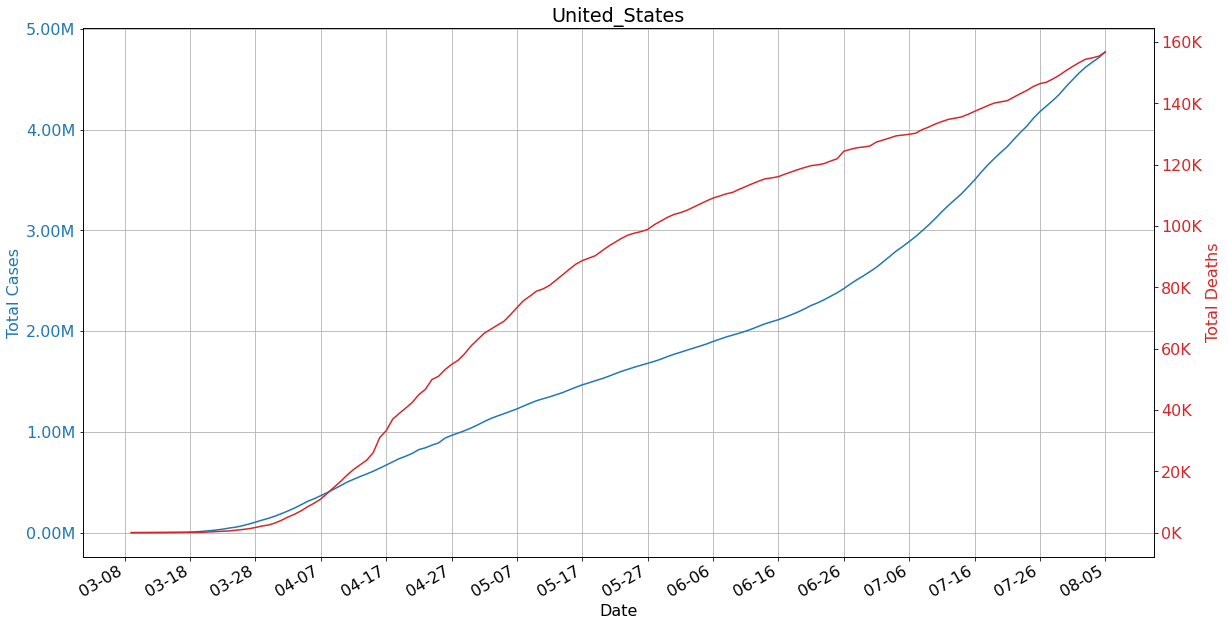

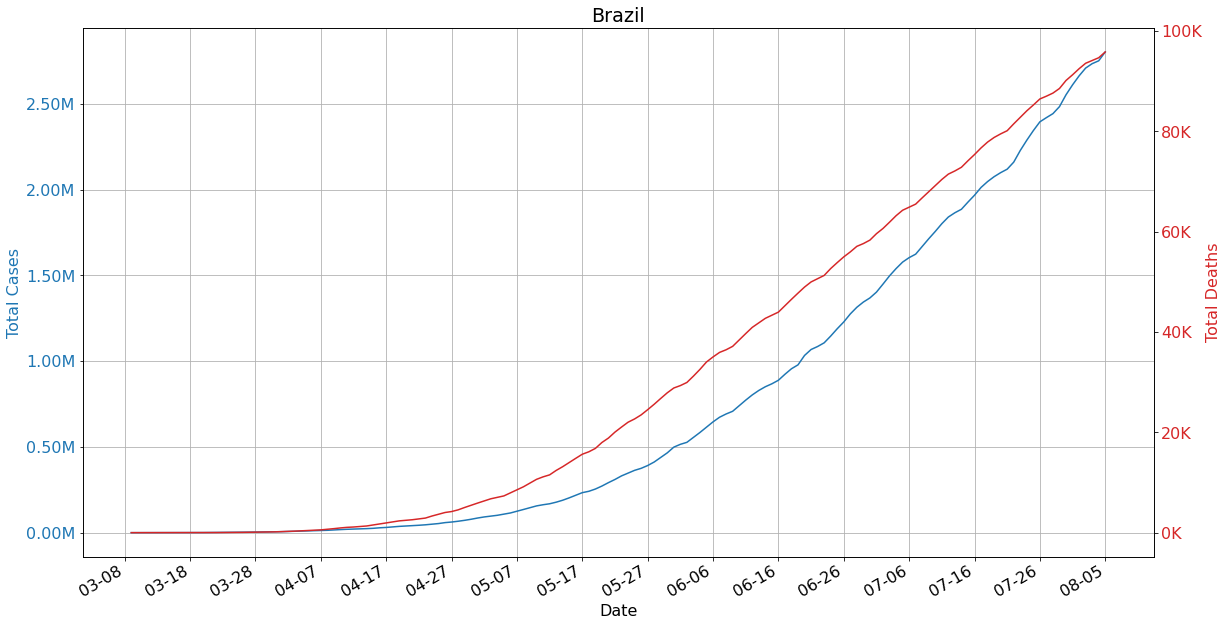

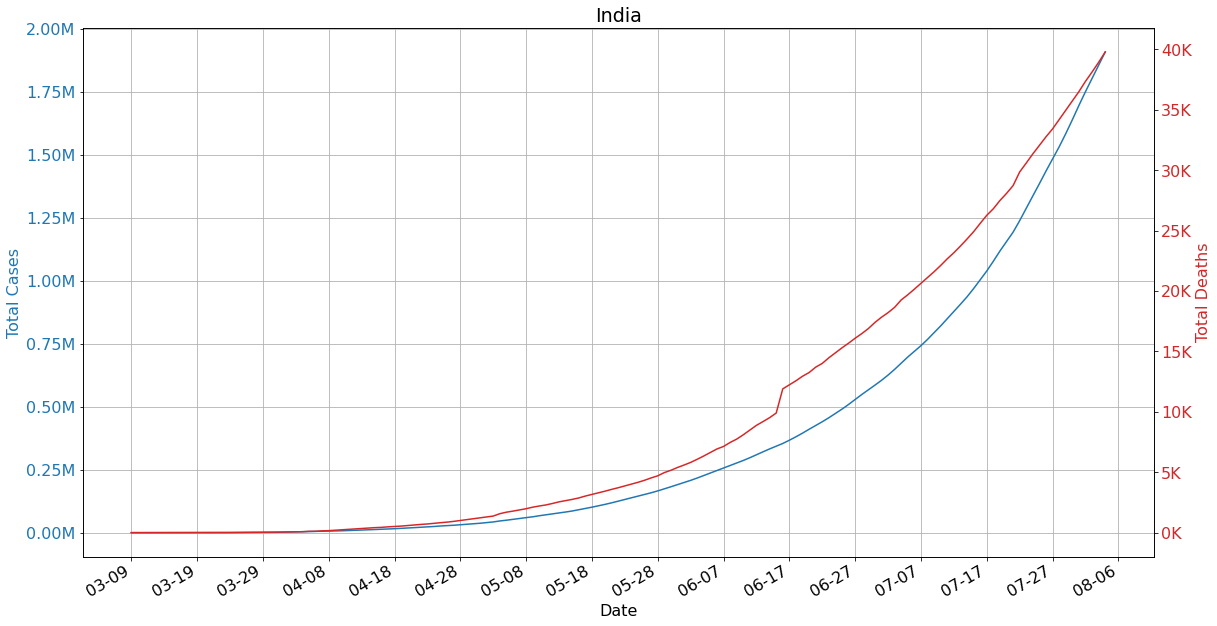

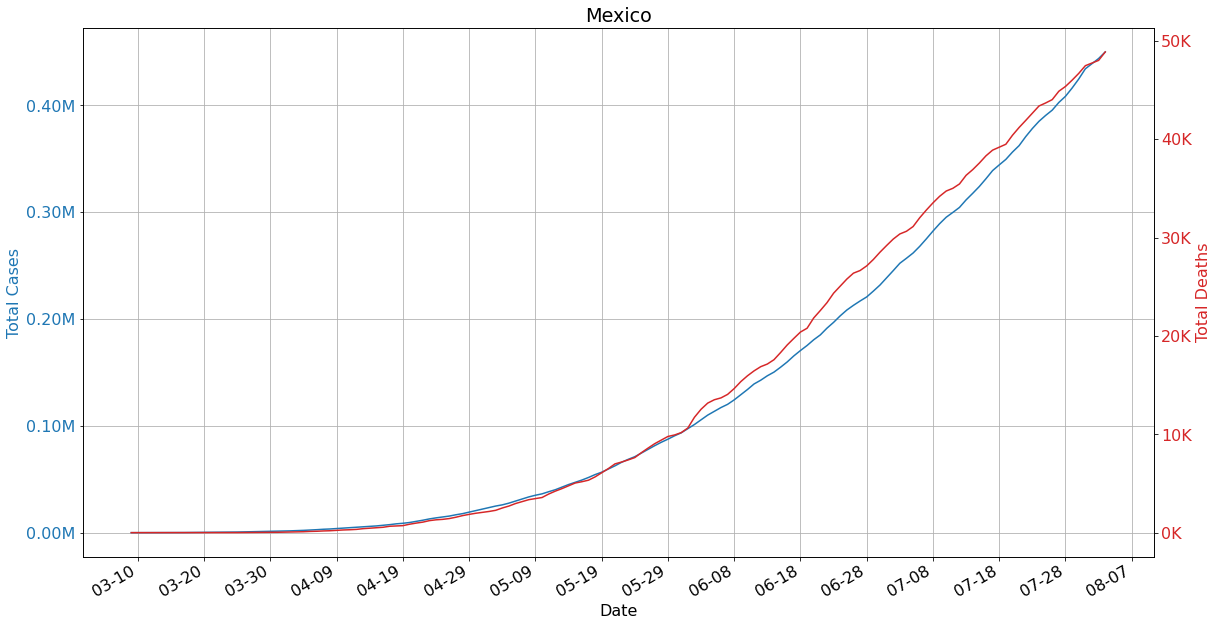

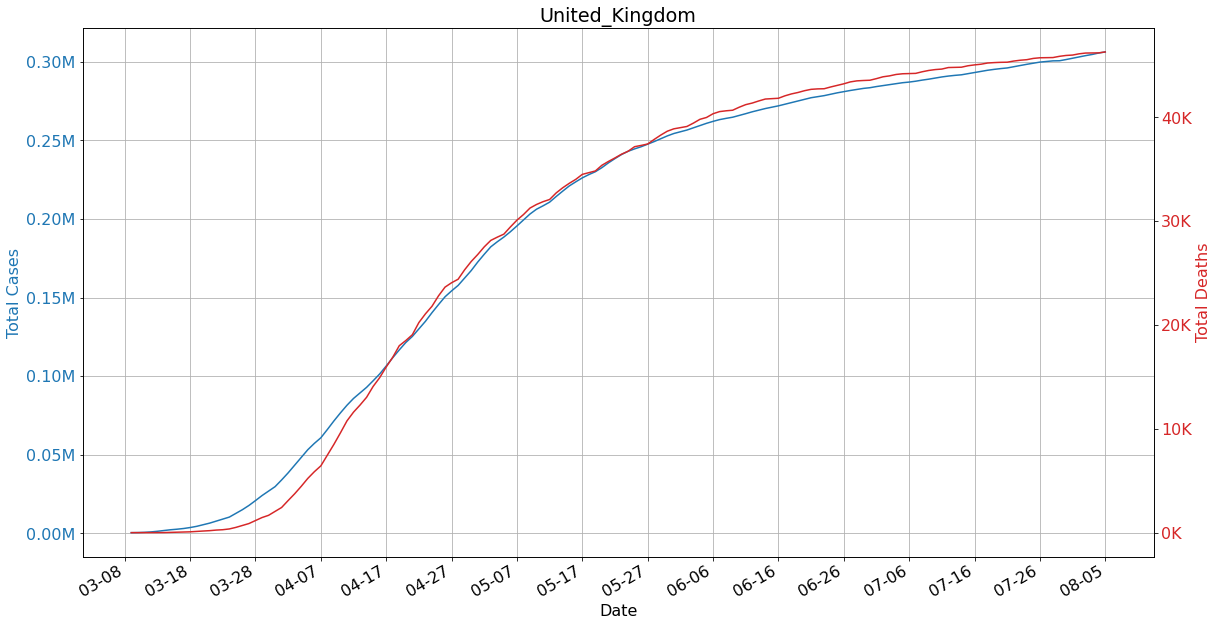

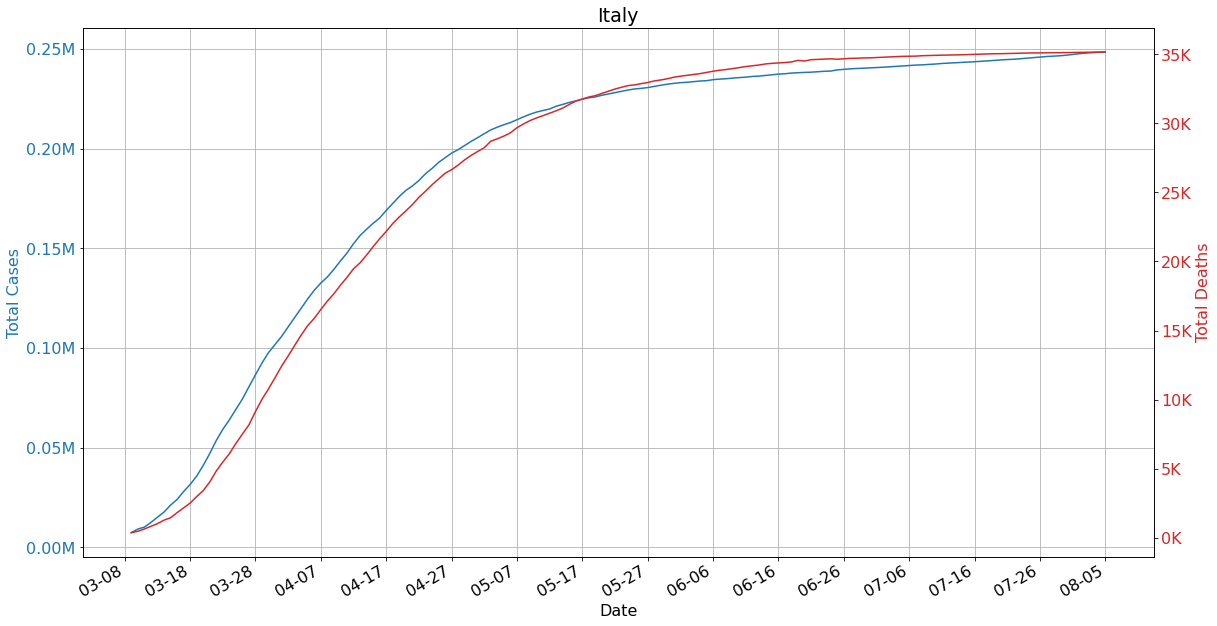

In [37]:
for index in range(1, len(dfCountry)+1,1):
    fig, ax1 = plt.subplots(figsize=(19.20,10.80))
    color = 'tab:blue'
    ax1.plot(dfTotalCases.date, dfTotalCases.iloc[:,index], color=color, label='Total Cases')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Total Cases', color=color)
    plt.title(dfCountry[index-1])
    ax1.tick_params(axis='y', labelcolor=color)
    plt.ticklabel_format(style='plain', axis='y')
    
    plt.grid()
    
    ax2 = ax1.twinx()

    color = 'tab:red'
    ax2.plot(dfTotalDeaths.date, dfTotalDeaths.iloc[:,index], color=color, label = 'Total Deaths')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Total Deaths', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
    
    ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
    ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K'))

    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

    plt.gcf().autofmt_xdate()
    plt.show()


### Daily cases and deaths by country

In [38]:
# for index in range(len(dfCountry)):
#     ax = dfNewCases.plot(x='date', y=[dfCountry[index]], figsize=(19.20,10.80))
#     dfNewDeaths.plot(ax=ax, x='date', y=[dfCountry[index]])
    
#     plt.ylabel('Total cases per day')
#     ax.legend(["Total Cases", "Total Deaths"]);
#     plt.title(dfCountry[index])
    
#     ax = plt.gca()
#     ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#     plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
#     plt.gcf().autofmt_xdate()
#     plt.grid()

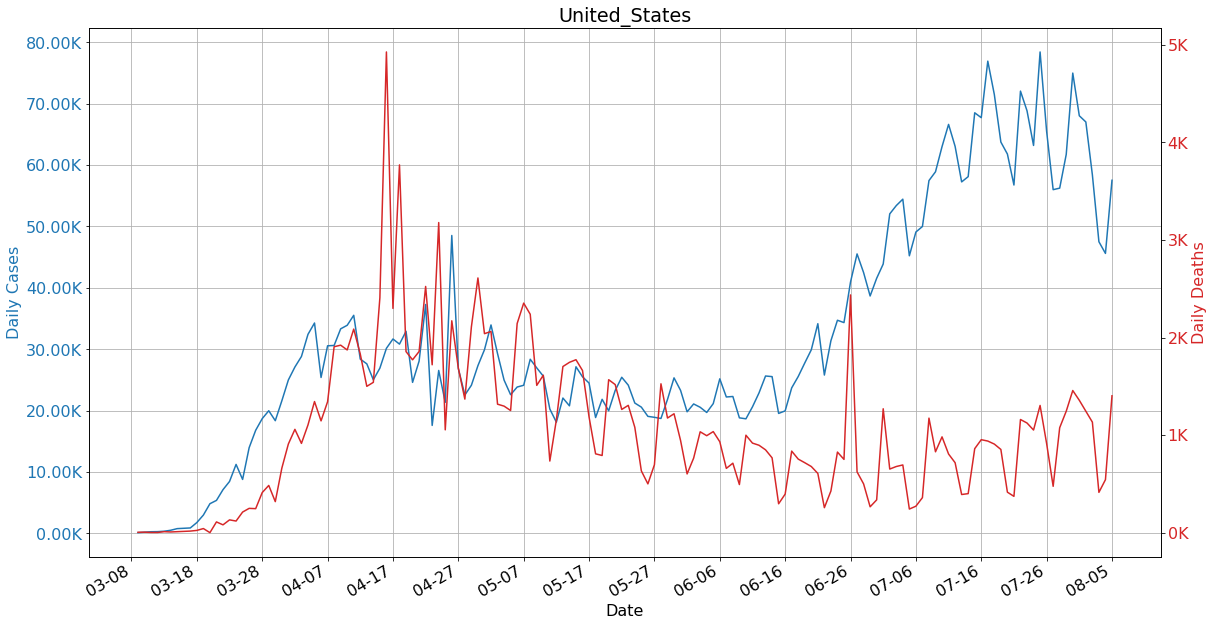

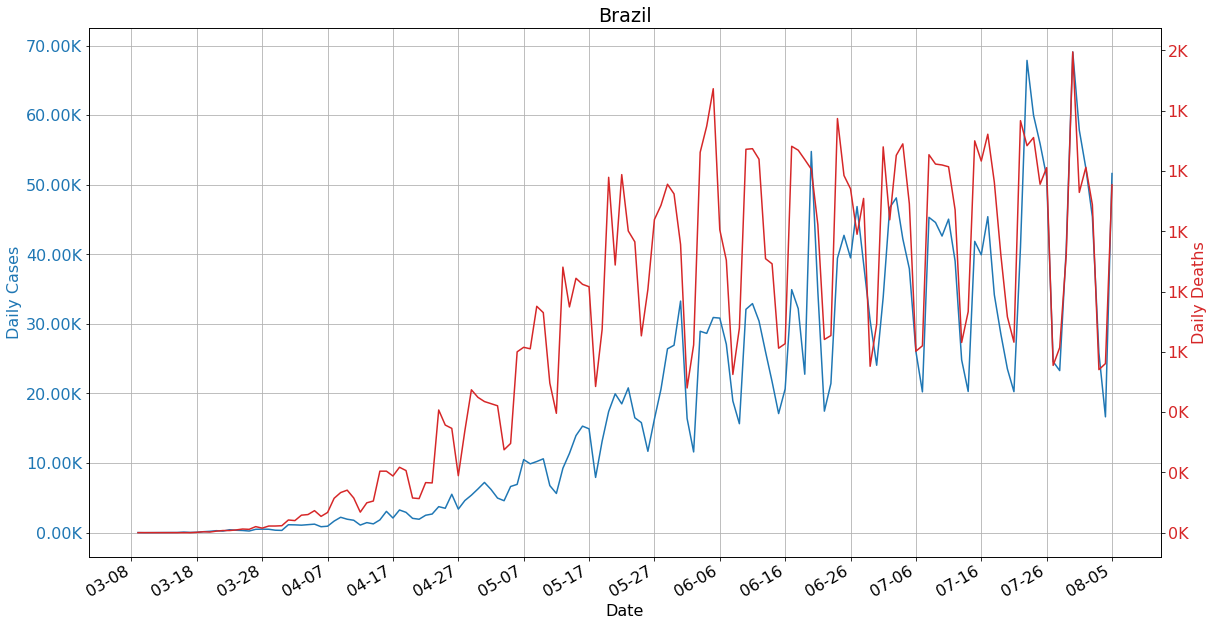

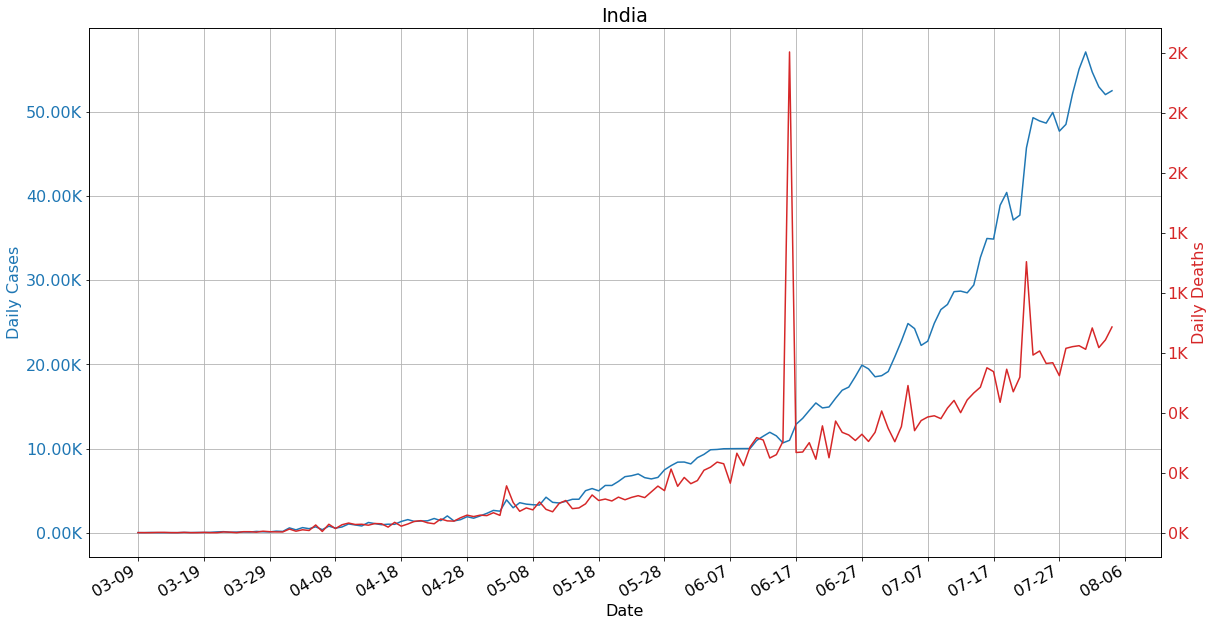

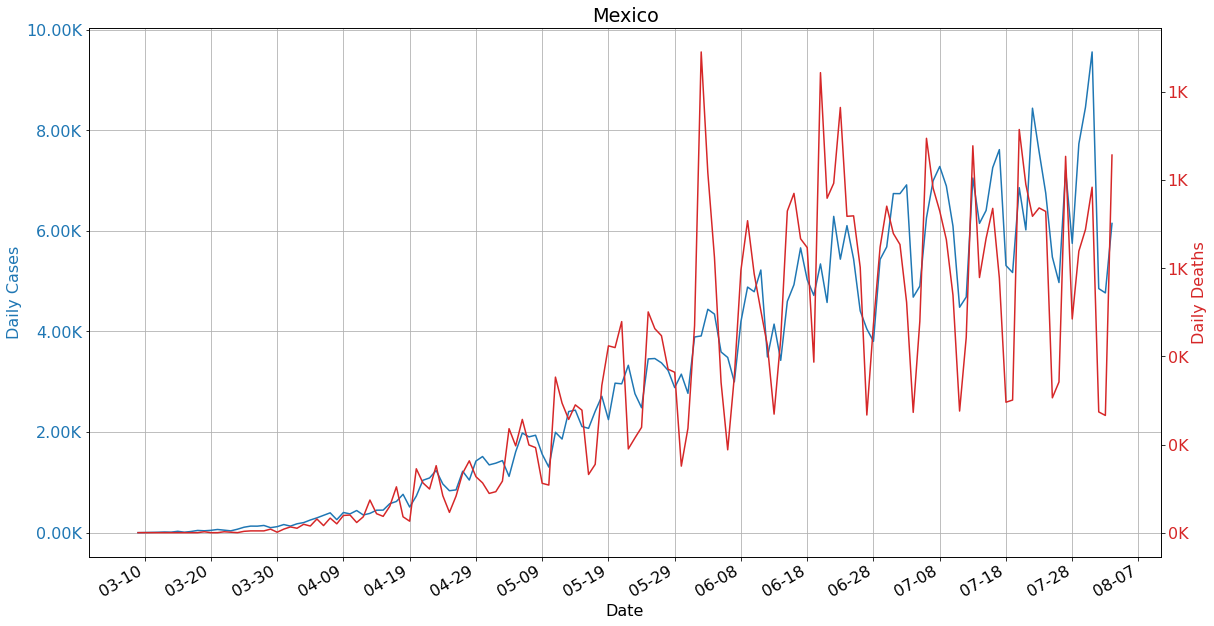

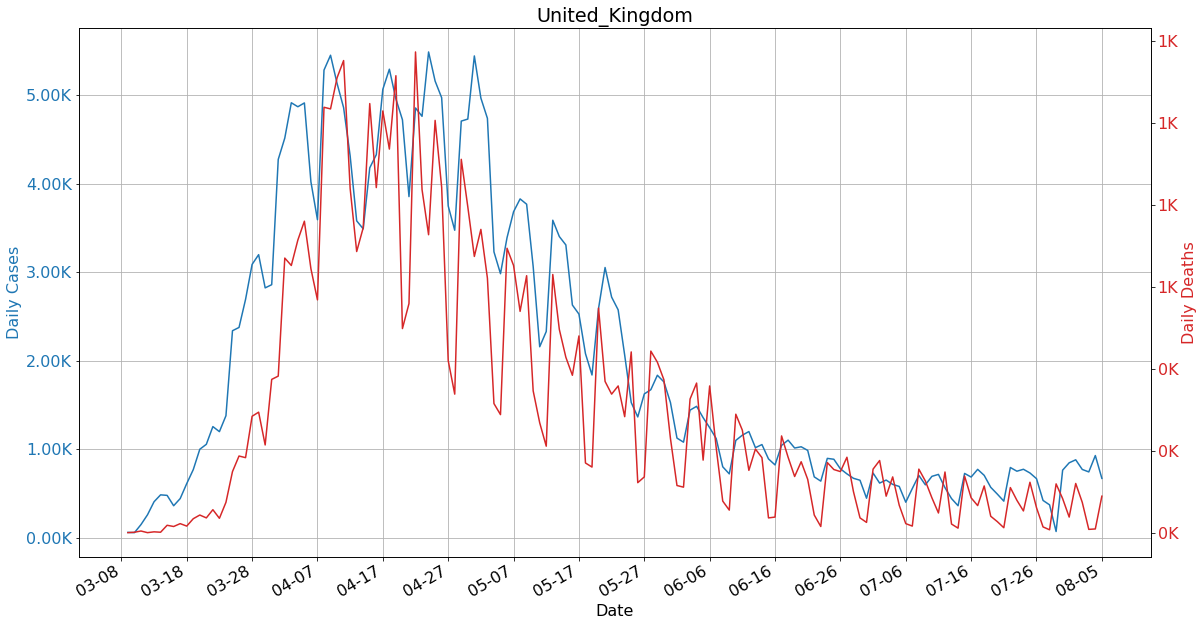

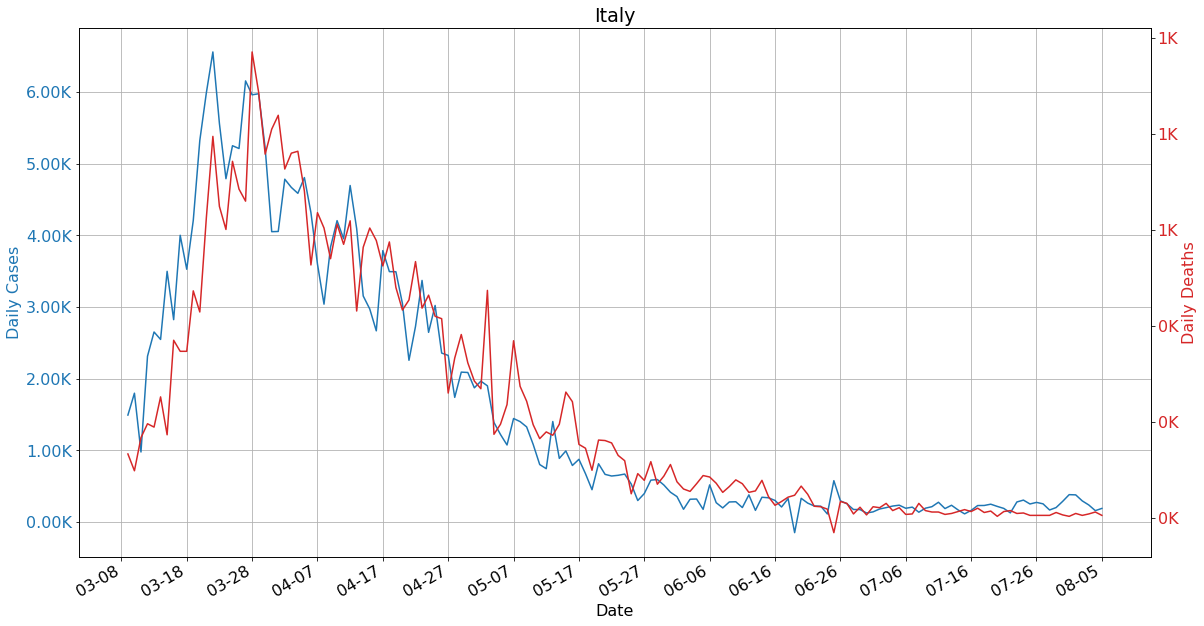

In [39]:
for index in range(1, len(dfCountry)+1,1):
    fig, ax1 = plt.subplots(figsize=(19.20,10.80))
    color = 'tab:blue'
    ax1.plot(dfNewCases.date, dfNewCases.iloc[:,index], color=color, label='Total Cases')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Daily Cases', color=color)
    plt.title(dfCountry[index-1])
    ax1.tick_params(axis='y', labelcolor=color)
    plt.ticklabel_format(style='plain', axis='y')
    
    plt.grid()
    
    ax2 = ax1.twinx()

    color = 'tab:red'
    ax2.plot(dfNewDeaths.date, dfNewDeaths.iloc[:,index], color=color, label = 'Total Deaths')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Daily Deaths', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
    
    ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000) + 'K'))
    ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K'))

    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

    plt.gcf().autofmt_xdate()
    plt.show()

## <span style="color:green">Brazil Cases</span>

In [40]:
df = pd.read_csv('caso_full.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.dropna()
df

city  city_ibge_code       date  epidemiological_week  \
0          São Paulo    3550308.0000 2020-02-25                     9   
2          São Paulo    3550308.0000 2020-02-26                     9   
4          São Paulo    3550308.0000 2020-02-27                     9   
6          São Paulo    3550308.0000 2020-02-28                     9   
8          São Paulo    3550308.0000 2020-02-29                     9   
...              ...             ...        ...                   ...   
481822    Tocantínia    1721109.0000 2020-08-04                    32   
481823      Tupirama    1721257.0000 2020-08-04                    32   
481824    Tupiratins    1721307.0000 2020-08-04                    32   
481825  Wanderlândia    1722081.0000 2020-08-04                    32   
481826       Xambioá    1722107.0000 2020-08-04                    32   

        estimated_population_2019  is_last  is_repeated  \
0                   12252023.0000    False        False   
2                   12252023.0000    False        False   
4                   12252023.0000    False        False   
6                   12252023.0000    False        False   
8                   12252023.0000    False        False   
...                           ...      ...          ...   
481822                  7545.0000    False         True   
481823                  1891.0000    False         True   
481824                  2671.0000    False         True   
481825                 11683.0000    False         True   
481826                 11540.0000    False         True   

        last_available_confirmed  \
0                              1   
2                              1   
4                              1   
6                              2   
8                              2   
...                          ...   
481822                       222   
481823                        23   
481824                         6   
481825                       158   
481826                       565   

        last_available_confirmed_per_100k_inhabitants last_available_date  \
0                                              0.0082          2020-02-25   
2                                              0.0082          2020-02-26   
4                                              0.0082          2020-02-27   
6                                              0.0163          2020-02-28   
8                                              0.0163          2020-02-29   
...                                               ...                 ...   
481822                                      2942.3459          2020-08-03   
481823                                      1216.2877          2020-08-03   
481824                                       224.6350          2020-08-03   
481825                                      1352.3924          2020-08-03   
481826                                      4896.0139          2020-08-03   

        last_available_death_rate  last_available_deaths  order_for_place  \
0                          0.0000                      0                1   
2                          0.0000                      0                2   
4                          0.0000                      0                3   
6                          0.0000                      0                4   
8                          0.0000                      0                5   
...                           ...                    ...              ...   
481822                     0.0180                      4               78   
481823                     0.0435                      1               74   
481824                     0.0000                      0               74   
481825                     0.0316                      5               99   
481826                     0.0142                      8               88   

       place_type state  new_confirmed  new_deaths  
0            city    SP              1           0  
2            city    SP              0   

In [41]:
cities = set(df.loc[:, 'city'].values)

In [42]:
brStates = sorted(set(df.loc[:, 'state'].values))

In [87]:
dfSelect = df.loc[:,['date', 'state', 'city', 'new_confirmed', 'new_deaths']]
dfToday = dfSelect[dfSelect['date'] > (pd.to_datetime("today") - pd.to_timedelta('2days'))]
dfToday

date state          city  new_confirmed  new_deaths
476323 2020-08-04    AC    Acrelândia              6           0
476324 2020-08-04    AC  Assis Brasil              9           0
476325 2020-08-04    AC     Brasiléia              2           1
476326 2020-08-04    AC        Bujari              4           0
476327 2020-08-04    AC      Capixaba             11           0
...           ...   ...           ...            ...         ...
481822 2020-08-04    TO    Tocantínia              0           0
481823 2020-08-04    TO      Tupirama              0           0
481824 2020-08-04    TO    Tupiratins              0           0
481825 2020-08-04    TO  Wanderlândia              0           0
481826 2020-08-04    TO       Xambioá              0           0

[5466 rows x 5 columns]

In [44]:
sumCases = dfSelect.groupby(['state']).sum()
sumCases.reset_index(level=0, inplace=True)
sumCases.loc[sumCases['new_confirmed'] <= 120000, ['state']] = 'Other_States'

In [45]:
sumCases = sumCases.groupby(['state']).sum()
sumCases = sumCases.sort_values(by=['new_confirmed'], ascending=False)
sumCases.reset_index(level=0, inplace=True)
sumCases

state  new_confirmed  new_deaths
0  Other_States        1237339       34032
1            SP         575529       23701
2            CE         178212        7819
3            BA         171051        3655
4            RJ         168920       13716
5            PA         160700        5817
6            MG         133320        2864
7            MA         123897        3085

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f84dc8f8fd0>,
      dtype=object)

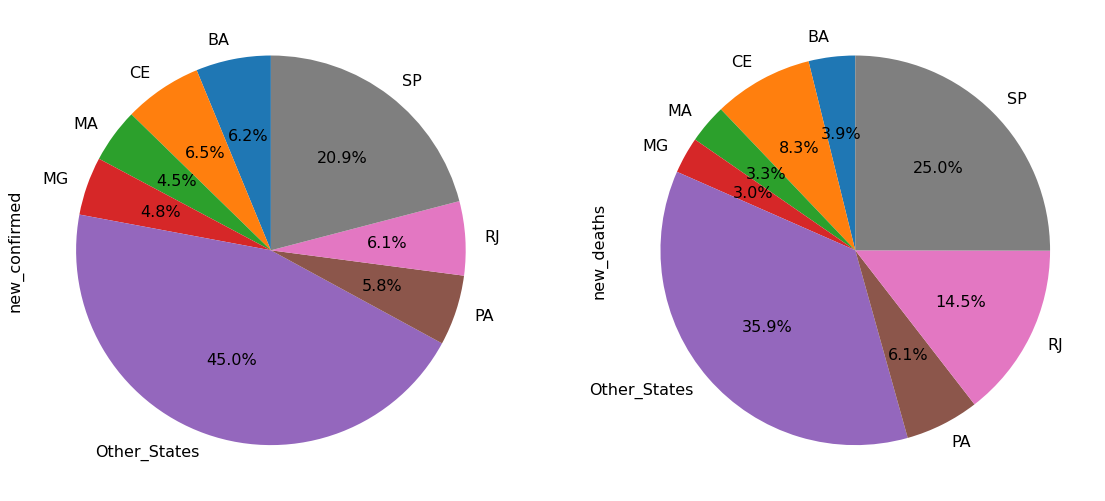

In [46]:
sumCases.groupby(['state']).sum().plot(kind='pie', legend=None, subplots=True, startangle=90,
                                       figsize=(19.20,10.80), autopct='%1.1f%%')

In [47]:
dfSP = dfToday[(dfToday['state'] == 'SP') & (dfToday['new_confirmed'] > 100)]
dfSP = dfSP.sort_values(by=['new_confirmed'], ascending=False)
dfSP

date state                   city  new_confirmed  new_deaths
481615 2020-08-04    SP              São Paulo           2574          58
481144 2020-08-04    SP               Campinas            449          18
481605 2020-08-04    SP  São José do Rio Preto            407           7
481578 2020-08-04    SP                 Santos            356           6
481597 2020-08-04    SP  São Bernardo do Campo            352           5
...           ...   ...                    ...            ...         ...
481344 2020-08-04    SP                   Lins            112           0
481097 2020-08-04    SP               Barretos            106           1
481190 2020-08-04    SP                Diadema            105           2
481622 2020-08-04    SP            São Vicente            102           5
481056 2020-08-04    SP              Americana            102           8

[32 rows x 5 columns]

In [48]:
today = (pd.to_datetime("today") - pd.to_timedelta('2days')).date()
today

datetime.date(2020, 8, 3)

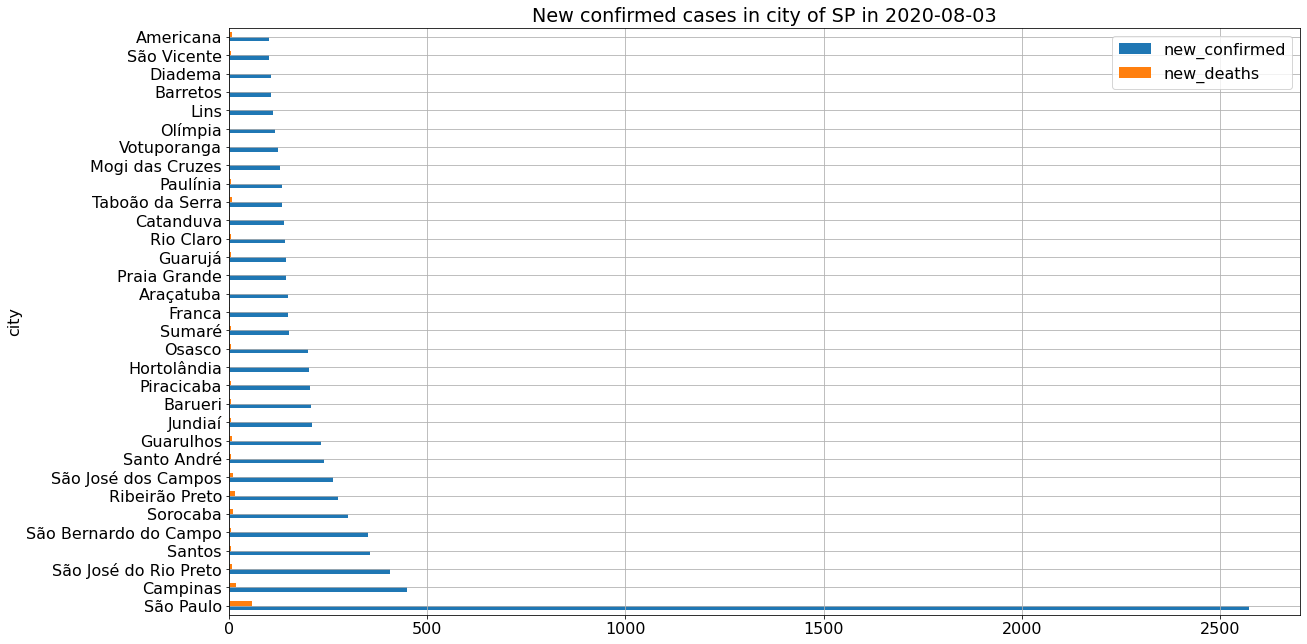

In [49]:
dfSP.plot.barh(x='city', y=['new_confirmed','new_deaths'], figsize=(19.20,10.80))
plt.title('New confirmed cases in city of SP in '+str(today))
plt.grid()

## Forecast to new deaths in World

#### LSTM Network for Regression

#### Source: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [50]:
dfPredict = dfWorld.loc[:,['date','new_deaths']]
dfPredict = dfPredict[(dfWorld['new_deaths'] > 200)]
dfPredict = dfPredict.sort_values(by='date', ascending=True)
dfPredict['date'] = dfPredict['date'].dt.year.astype('str')+'-'+dfPredict['date'].dt.month.astype('str')+'-'+dfPredict['date'].dt.day.astype('str')
dfPredict.reset_index(drop=True, inplace=True)
dfPredict

date  new_deaths
0     2020-3-9    228.0000
1    2020-3-10    208.0000
2    2020-3-11    273.0000
3    2020-3-12    326.0000
4    2020-3-13    350.0000
..         ...         ...
145   2020-8-1   6209.0000
146   2020-8-2   5777.0000
147   2020-8-3   3970.0000
148   2020-8-4   4498.0000
149   2020-8-5   6806.0000

[150 rows x 2 columns]

In [51]:
dfDeaths = dfPredict.drop(['date'],axis=1)

In [52]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dfDeaths)

In [53]:
train_size = int(len(dataset)*0.75)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print(len(train), len(test))

112 38


In [54]:
def create_dataset(dataset, lookBack=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-lookBack-1):
        a = dataset[i:(i+lookBack),0]
        dataX.append(a)
        dataY.append(dataset[i+lookBack,0])
    return np.array(dataX), np.array(dataY)

In [55]:
lookBack = 1
trainX, trainY = create_dataset(train, lookBack)
testX, testY = create_dataset(test, lookBack)

In [56]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [57]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=((1, lookBack))))
model.add(keras.layers.Dense(1))
optAdam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [58]:
history = model.fit(trainX, trainY, epochs=50, batch_size=10, validation_split=0.01, verbose=1, shuffle=False)

Epoch 1/50
11/11 [==============================] - 2s 148ms/step - loss: 0.1772 - mse: 0.1772 - val_loss: 0.2133 - val_mse: 0.2133
Epoch 2/50
11/11 [==============================] - 0s 23ms/step - loss: 0.1293 - mse: 0.1293 - val_loss: 0.1523 - val_mse: 0.1523
Epoch 3/50
11/11 [==============================] - 0s 16ms/step - loss: 0.0888 - mse: 0.0888 - val_loss: 0.1006 - val_mse: 0.1006
Epoch 4/50
11/11 [==============================] - 0s 30ms/step - loss: 0.0569 - mse: 0.0569 - val_loss: 0.0605 - val_mse: 0.0605
Epoch 5/50
11/11 [==============================] - 0s 17ms/step - loss: 0.0355 - mse: 0.0355 - val_loss: 0.0343 - val_mse: 0.0343
Epoch 6/50
11/11 [==============================] - 0s 23ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 7/50
11/11 [==============================] - 0s 23ms/step - loss: 0.0211 - mse: 0.0211 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 8/50
11/11 [==============================] - 0s 24ms/step - loss: 0.0206 - 

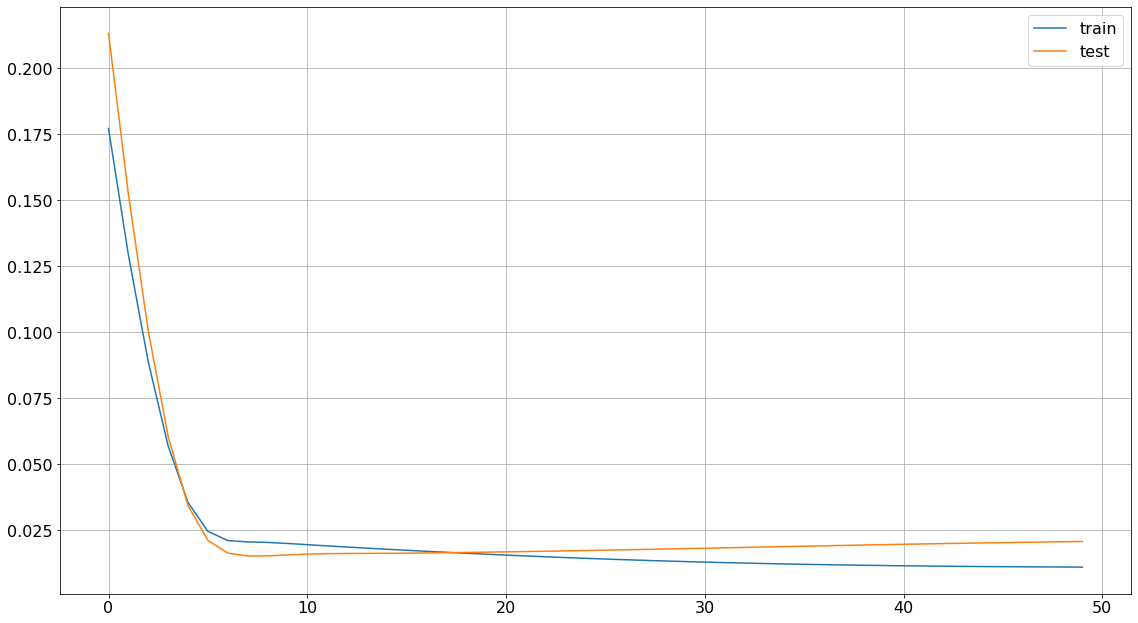

In [59]:
fig = plt.gcf()
fig.set_size_inches(19.20,10.80)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.grid()
plt.legend()

In [60]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [61]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [62]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1084.49 RMSE
Test Score: 1217.14 RMSE


In [63]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookBack:len(trainPredict)+lookBack, :] = trainPredict

In [64]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(lookBack*2)+1:len(dataset)-1, :] = testPredict

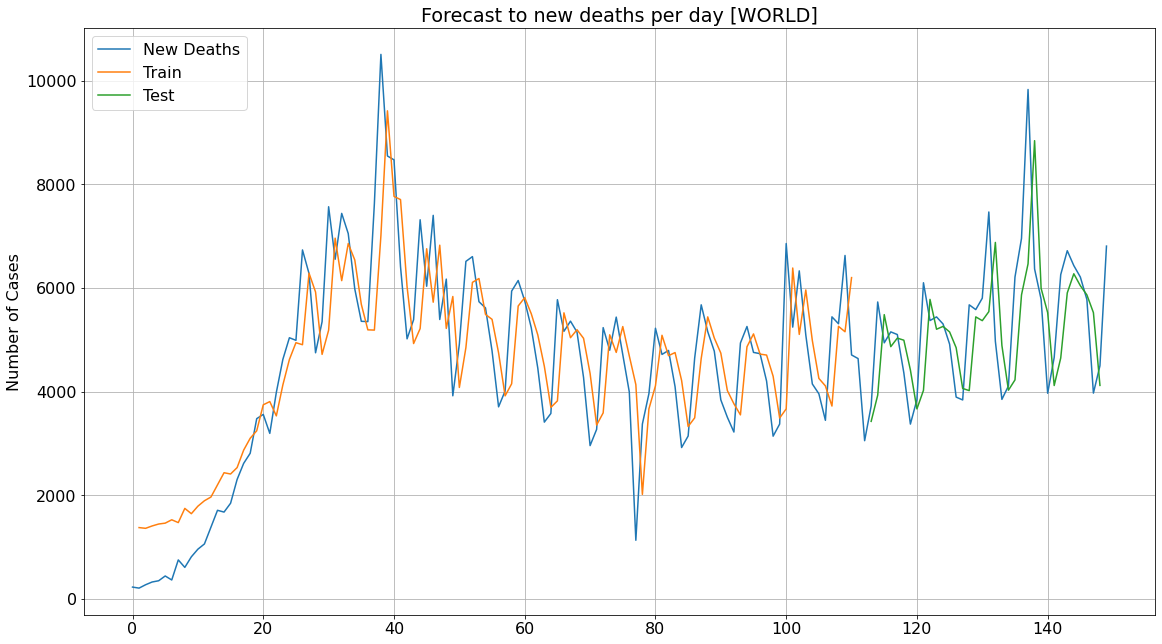

In [65]:
fig = plt.gcf()
fig.set_size_inches(19.20,10.80)

plt.ylabel('Number of Cases')
plt.title('Forecast to new deaths per day [WORLD]')

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.gca().legend(('New Deaths','Train','Test'))

plt.grid()
plt.show()

### Simple Linear Regression

#### Source: https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

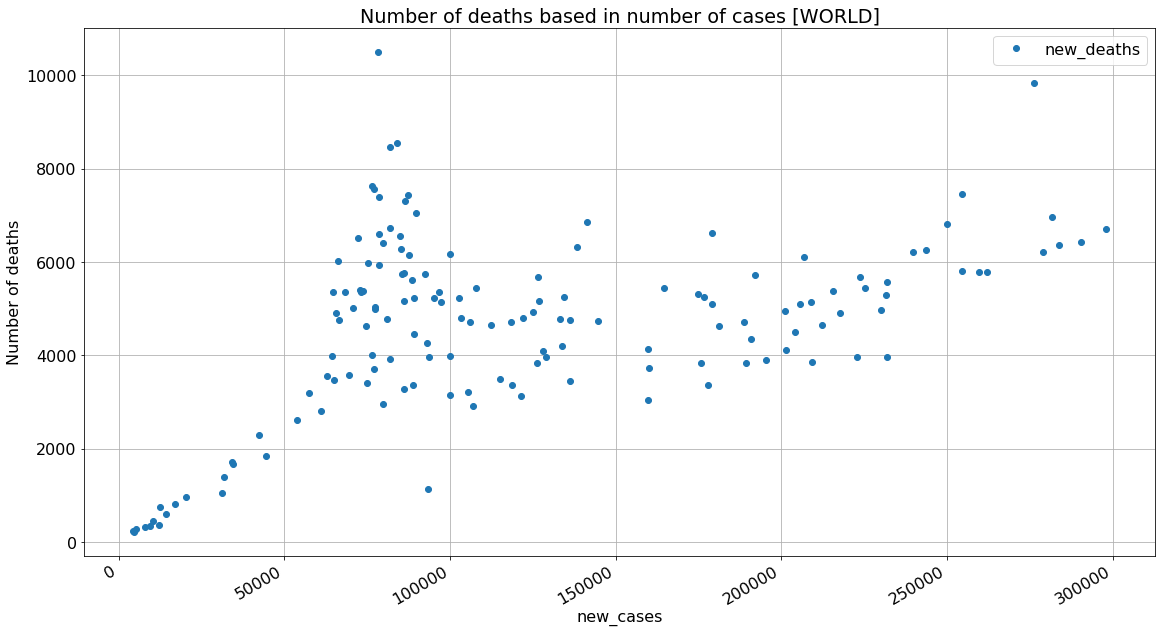

In [66]:
dfWorld.plot(x='new_cases', y='new_deaths', style='o', figsize=(19.20,10.80))

plt.ylabel('Number of deaths')
plt.title('Number of deaths based in number of cases [WORLD]')

ax = plt.gca()
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

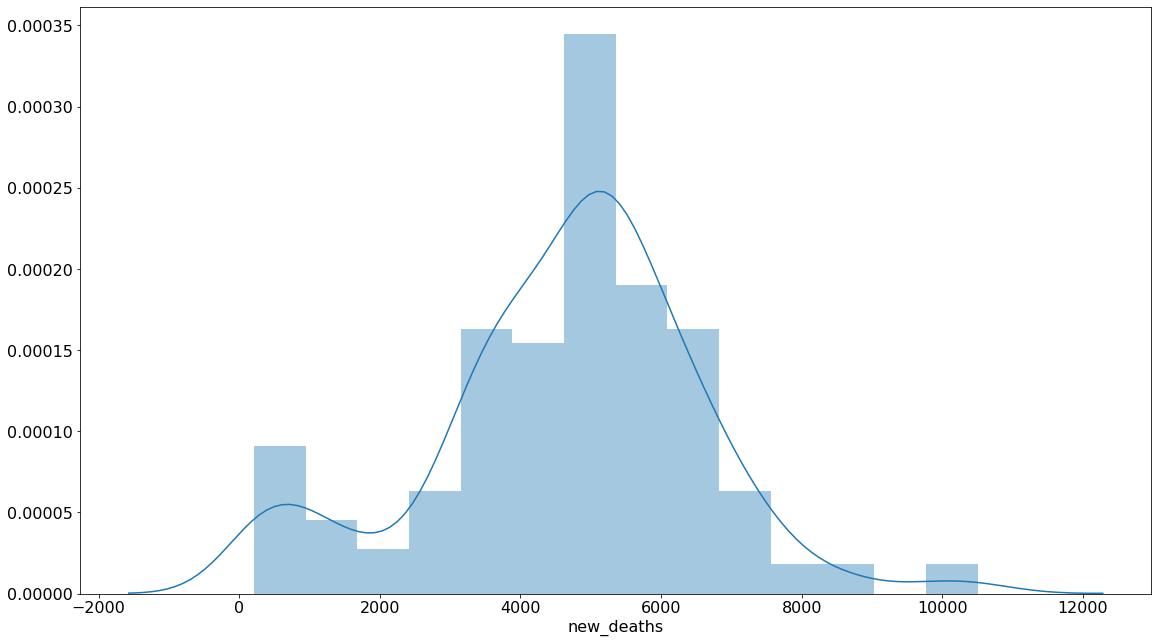

In [67]:
plt.figure(figsize=(19.20,10.80))
plt.tight_layout()
seabornInstance.distplot(dfWorld['new_deaths'])

In [68]:
X = dfWorld['new_deaths'].values.reshape(-1,1)
y = dfWorld['new_cases'].values.reshape(-1,1)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0) 

In [70]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [71]:
print(regressor.intercept_)

[32657.14655285]


In [72]:
print(regressor.coef_)

[[19.27382364]]


In [73]:
y_pred = regressor.predict(X_test)

In [74]:
dfLinear = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
dfLinear

Actual   Predicted
0  192066.0000 143057.6083
1   88991.0000 118444.9356
2   89590.0000 168499.0555
3  164486.0000 137526.0210
4   12505.0000  47151.0619
..         ...         ...
55 209338.0000 106842.0937
56 136329.0000  99055.4690
57 262131.0000 144002.0257
58  65539.0000 127387.9897
59 222876.0000 109174.2264

[60 rows x 2 columns]

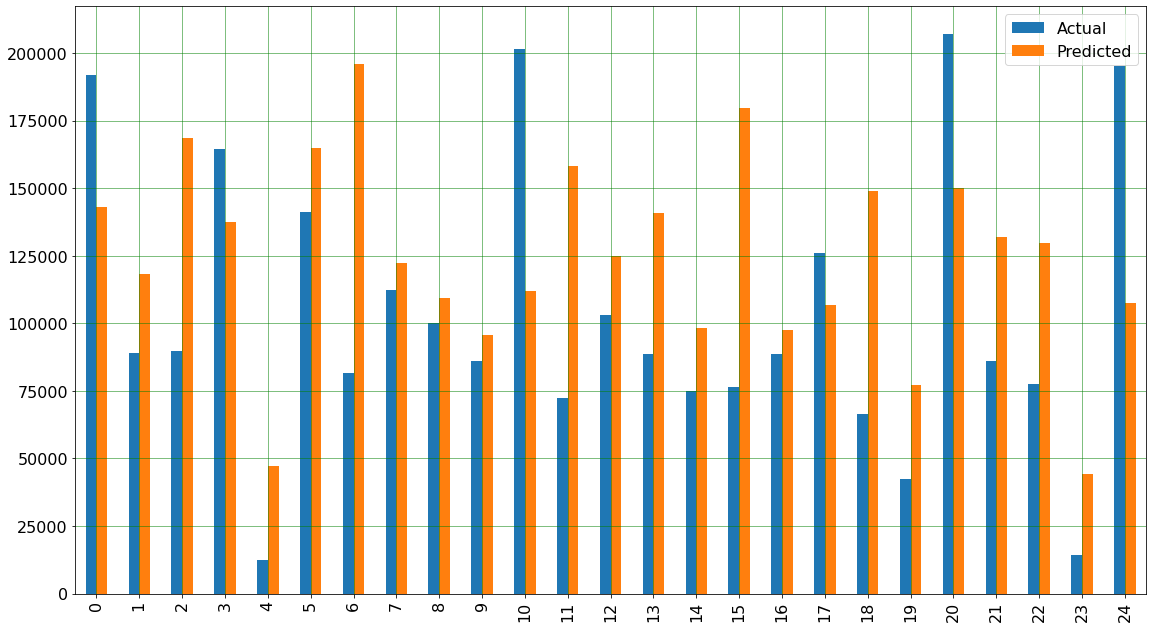

In [75]:
dfLinear = dfLinear.head(25)
dfLinear.plot(kind='bar',figsize=(19.20,10.80))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

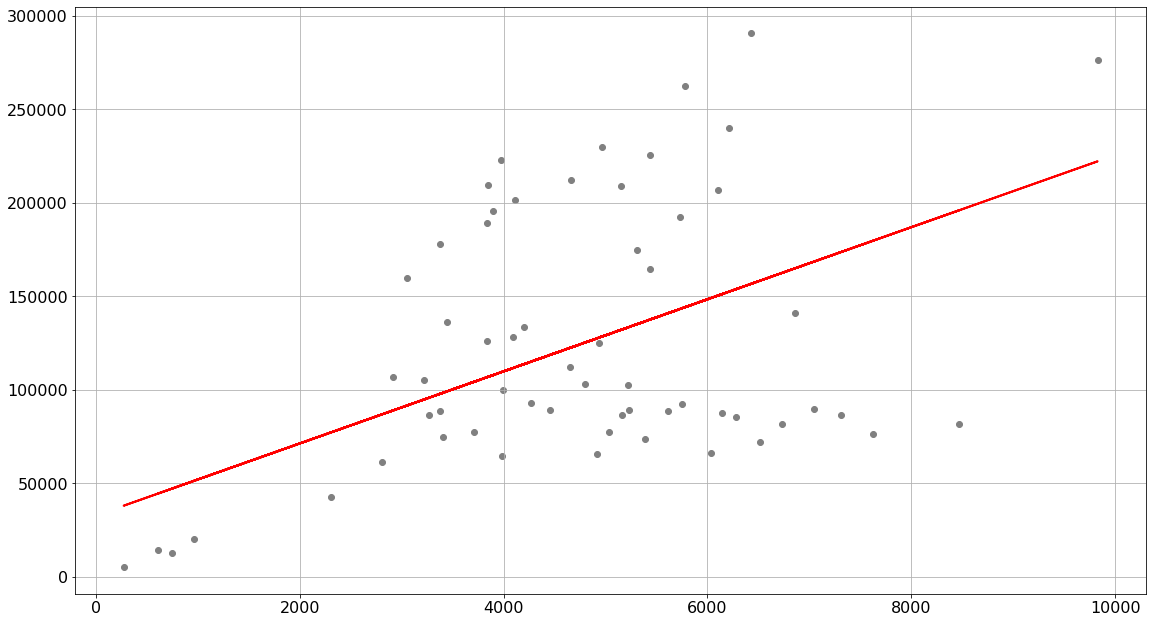

In [76]:
plt.figure(figsize=(19.20,10.80))
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.grid()
plt.show()

In [77]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 54274.05624549785
Mean Squared Error: 4036332679.463921
Root Mean Squared Error: 4036332679.463921


### Polynomial Regression

#### Source: https://towardsdatascience.com/understanding-regression-using-covid-19-dataset-detailed-analysis-be7e319e3a50

In [78]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

poly.fit(X_poly, y)
lin = LinearRegression()
lin.fit(X_poly, y)
pred = lin.predict(X_poly)
new_X, new_y = zip(*sorted(zip(X, pred)))

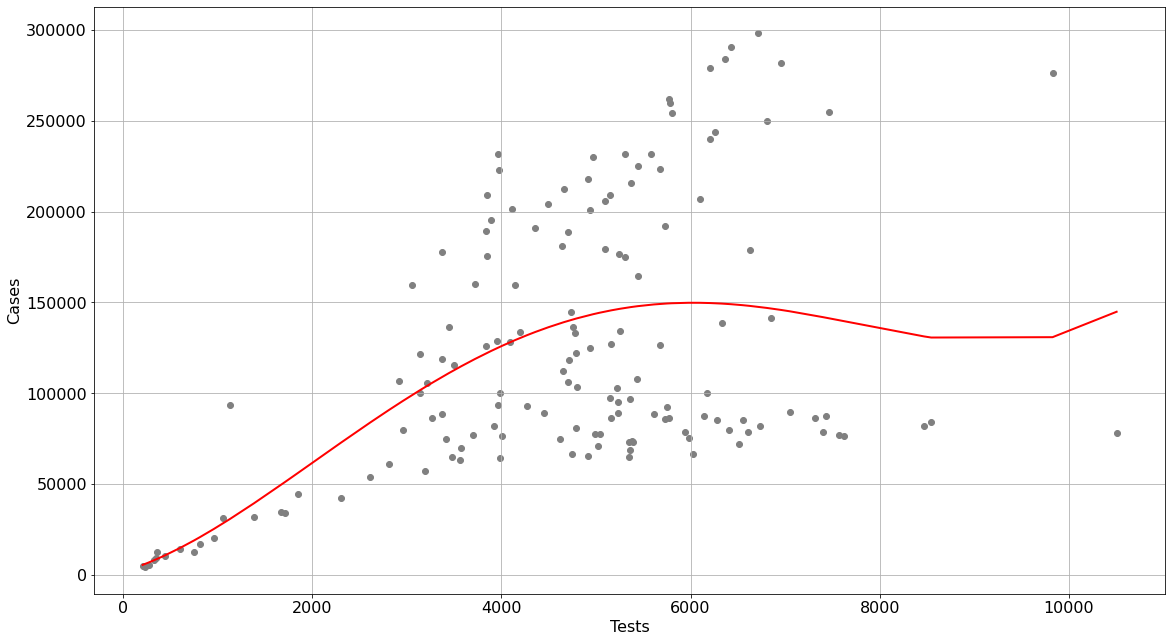

In [79]:
plt.figure(figsize=(19.20,10.80))
plt.scatter(X, y, color='gray')
plt.plot(new_X, new_y, color='red', linewidth=2)
plt.xlabel("Tests")
plt.ylabel("Cases")
plt.grid()
plt.show()

### OLD PLOTS

In [80]:
# dfBrazil = df[df['location'] == 'Brazil']
# dfBrazil = dfBrazil.sort_values(by='date', ascending=True)
# dfBrazil.reset_index(drop=True, inplace=True)
# dfBrazil

In [81]:
# dfBrazil.plot(x='date', y=['total_deaths','total_cases'], figsize=(19.20,10.80))

# plt.ylabel('Number of Cases')
# plt.title('Cases and Deaths [BRAZIL]')

# ax = plt.gca()
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
# plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
# plt.gcf().autofmt_xdate()

# plt.grid()
# plt.show()

In [82]:
# dfBrazil.plot(x='date', y='new_cases', figsize=(19.20,10.80))

# plt.ylabel('Number of Cases')
# plt.title('New cases per day [BRAZIL]')

# ax = plt.gca()
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
# plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
# plt.gcf().autofmt_xdate()

# plt.grid()
# plt.show()

In [83]:
# dfBrazil.plot(x='date', y='new_deaths', figsize=(19.20,10.80))

# plt.ylabel('Number of Cases')
# plt.title('New deaths per day [BRAZIL]')

# ax = plt.gca()
# # ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
# plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
# plt.gcf().autofmt_xdate()

# plt.grid()
# plt.show()

In [84]:
# dfDiff = dfBrazil.loc[:,['date','new_deaths']]
# dfDiff['prev_cases'] = dfDiff['new_deaths'].shift(1)
# dfDiff = dfDiff.dropna()
# dfDiff['diff'] = (dfDiff['new_deaths'] - dfDiff['prev_cases'])

# dfDiff['date'] = pd.to_datetime(dfDiff['date'])

# dfDiff

In [85]:
# fig = go.Figure([go.Bar(x=dfDiff['date'], y=dfDiff['diff'])])

# fig.update_layout(xaxis_tickformat = '%m-%d', title='Difference in deaths compared to the previous day')
# fig.update_xaxes(nticks=25, tickangle=315)

# fig.show()